In [1]:
from manim import *
import math
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching partial_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_Scene"

video_index_scene = " -v WARNING --progress_bar None --disable_caching partial_index_Scene"
image_index_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_index_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


Output saved by creating file at animations/partial_differentiation/partial.mp4.


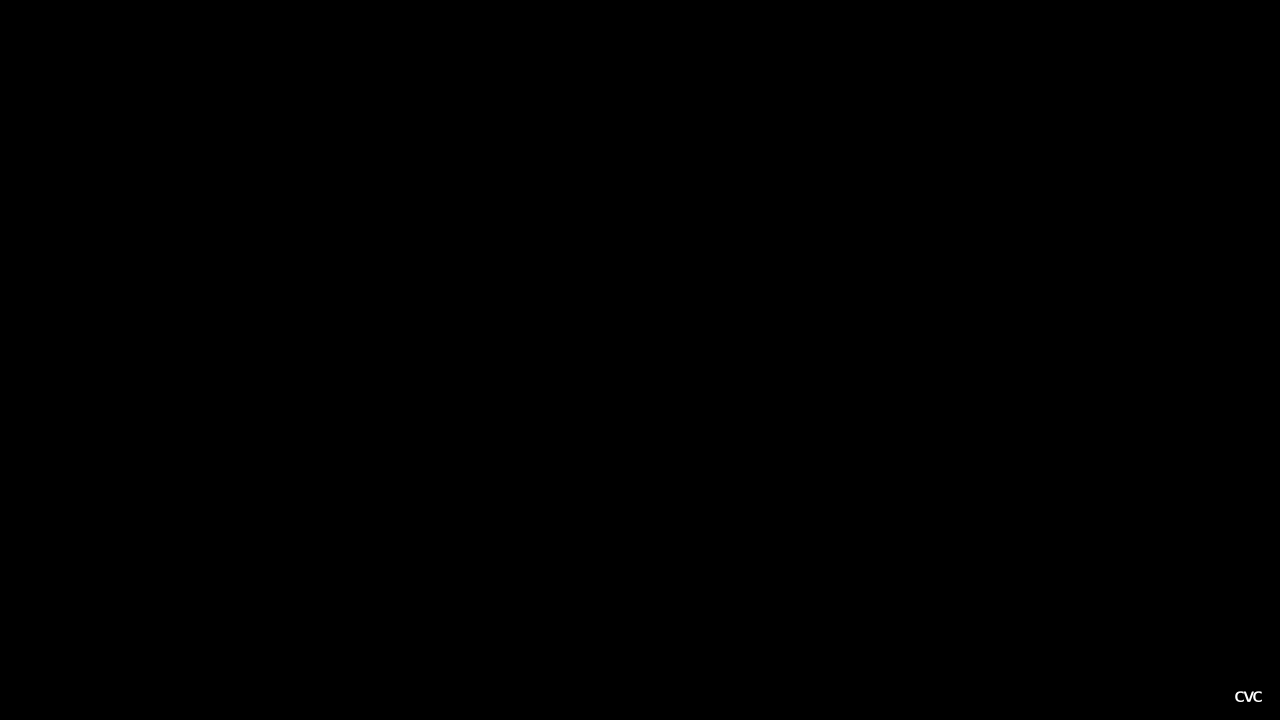

In [3]:
%%capture_video --path "animations/partial_differentiation/partial.mp4"
%%manim -qm --fps 60 $video_scene

class partial_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)